# Universidad Del Valle de Guatemala
## Deep Learning
### Proyecto Final: Red Neuronal Recurrente que predice el ganador de un partido de la liga BBVA.
#### Integrantes: 
- Roberto Rios 20979
- Javier Mombiela 20067

#### Importación de librerias

In [299]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
from sklearn.model_selection import train_test_split

#### Carga de data

In [300]:
data = pd.read_csv('temporadas.csv')

Visualizacion de data

In [301]:
print(data.count())
data

Date        3800
HomeTeam    3800
AwayTeam    3800
FTHG        3800
FTAG        3800
FTR         3800
HTHG        3800
HTAG        3800
HTR         3800
HS          3800
AS          3800
HST         3800
AST         3800
HF          3800
AF          3800
HC          3800
AC          3800
HY          3800
AY          3800
HR          3800
AR          3800
dtype: int64


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,17/08/13,Sociedad,Getafe,2,0,H,1,0,H,16,...,6,2,13,6,6,5,1,1,0,0
1,17/08/13,Valencia,Malaga,1,0,H,0,0,D,9,...,1,2,15,23,9,6,3,5,0,0
2,17/08/13,Valladolid,Ath Bilbao,1,2,A,1,1,D,8,...,2,3,10,8,5,5,1,0,0,0
3,18/08/13,Barcelona,Levante,7,0,H,6,0,H,22,...,13,1,15,16,9,3,1,3,0,0
4,18/08/13,Osasuna,Granada,1,2,A,0,2,A,14,...,5,4,15,17,7,6,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,04/06/2023,Betis,Valencia,1,1,D,1,0,H,8,...,3,3,11,11,5,4,3,0,0,1
3796,04/06/2023,Celta,Barcelona,2,1,H,1,0,H,12,...,9,2,13,9,2,4,2,2,0,0
3797,04/06/2023,Elche,Cadiz,1,1,D,0,1,A,12,...,5,3,18,8,7,4,4,3,0,0
3798,04/06/2023,Espanol,Almeria,3,3,D,1,1,D,12,...,8,4,11,12,7,6,2,3,0,0


Comprobar si hay valores nulos o faltantes en el conjunto de datos

In [302]:
print(data.isnull().sum())

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


#### Preprocesamiento de datos

Codificacion de etiquetas para los equipos y variable objeitov FTR (Full Time Result)

In [303]:
team_label_encoder = LabelEncoder()
data['HomeTeam'] = team_label_encoder.fit_transform(data['HomeTeam'])
data['AwayTeam'] = team_label_encoder.fit_transform(data['AwayTeam'])

result_label_encoder = LabelEncoder()
data['FTR'] = result_label_encoder.fit_transform(data['FTR'])

Ver la codificacion de cada variable

In [304]:
team_mapping = dict(zip(team_label_encoder.classes_, team_label_encoder.transform(team_label_encoder.classes_)))
print(team_mapping)

{'Alaves': 0, 'Almeria': 1, 'Ath Bilbao': 2, 'Ath Madrid': 3, 'Barcelona': 4, 'Betis': 5, 'Cadiz': 6, 'Celta': 7, 'Cordoba': 8, 'Eibar': 9, 'Elche': 10, 'Espanol': 11, 'Getafe': 12, 'Girona': 13, 'Granada': 14, 'Huesca': 15, 'La Coruna': 16, 'Las Palmas': 17, 'Leganes': 18, 'Levante': 19, 'Malaga': 20, 'Mallorca': 21, 'Osasuna': 22, 'Real Madrid': 23, 'Sevilla': 24, 'Sociedad': 25, 'Sp Gijon': 26, 'Valencia': 27, 'Valladolid': 28, 'Vallecano': 29, 'Villarreal': 30}


In [305]:
result_mapping = dict(zip(result_label_encoder.classes_, result_label_encoder.transform(result_label_encoder.classes_)))
print(result_mapping)

{'A': 0, 'D': 1, 'H': 2}


Visualizar las primeras filas para comprobar la codificacion

In [306]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,17/08/13,25,12,2,0,2,1,0,H,16,...,6,2,13,6,6,5,1,1,0,0
1,17/08/13,27,20,1,0,2,0,0,D,9,...,1,2,15,23,9,6,3,5,0,0
2,17/08/13,28,2,1,2,0,1,1,D,8,...,2,3,10,8,5,5,1,0,0,0
3,18/08/13,4,19,7,0,2,6,0,H,22,...,13,1,15,16,9,3,1,3,0,0
4,18/08/13,22,14,1,2,0,0,2,A,14,...,5,4,15,17,7,6,1,4,0,0


#### Agregar estadisticas a la data

Funciones lambda para calcular estadisticas (puntos, head-to-head wins y diferencia de goles)

In [307]:
# puntos sumados
data['PH'] = data.apply(lambda row: 3 if row['FTR'] == 2 else 1 if row['FTR'] == 1 else 0, axis=1)
data['PA'] = data.apply(lambda row: 3 if row['FTR'] == 0 else 1 if row['FTR'] == 1 else 0, axis=1)

# diferencia de goles
data['GDH'] = data['FTHG'] - data['FTAG']
data['GDA'] = data['FTAG'] - data['FTHG']

# victorias head to head
data['HHHW'] = 0
data['HHAW'] = 0

Calculando las estadisticias de los ultimos 10 partidos

In [308]:
for team in data['HomeTeam'].unique():
    mask = (data['HomeTeam'] == team)
    team_data = data[mask]
    for i in range(len(team_data)):
        data.loc[team_data.index[i], 'PH'] = team_data['PH'].iloc[max(0, i-10):i].sum()
        data.loc[team_data.index[i], 'GDH'] = team_data['GDH'].iloc[max(0, i-10):i].sum()

for team in data['AwayTeam'].unique():
    mask = (data['AwayTeam'] == team)
    team_data = data[mask]
    for i in range(len(team_data)):
        data.loc[team_data.index[i], 'PA'] = team_data['PA'].iloc[max(0, i-10):i].sum()
        data.loc[team_data.index[i], 'GDA'] = team_data['GDA'].iloc[max(0, i-10):i].sum()

for i in range(len(data)):
    previous_matches = data[((data['HomeTeam'] == data.loc[i, 'HomeTeam']) & (data['AwayTeam'] == data.loc[i, 'AwayTeam'])) | ((data['HomeTeam'] == data.loc[i, 'AwayTeam']) & (data['AwayTeam'] == data.loc[i, 'HomeTeam']))][:i]
    
    home_wins = len(previous_matches[((previous_matches['HomeTeam'] == data.loc[i, 'HomeTeam']) & (previous_matches['FTR'] == 2)) | ((previous_matches['AwayTeam'] == data.loc[i, 'HomeTeam']) & (previous_matches['FTR'] == 0))])
    away_wins = len(previous_matches[((previous_matches['HomeTeam'] == data.loc[i, 'AwayTeam']) & (previous_matches['FTR'] == 2)) | ((previous_matches['AwayTeam'] == data.loc[i, 'AwayTeam']) & (previous_matches['FTR'] == 0))])
    
    data.loc[i, 'HHHW'] = home_wins
    data.loc[i, 'HHAW'] = away_wins

Colaborar que si se hayan agregado las nuevas columnas al dataset

In [309]:
data.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,PH,PA,GDH,GDA,HHHW,HHAW
3795,04/06/2023,5,27,1,1,1,1,0,H,8,...,3,0,0,1,14,6,1,-8,7,6
3796,04/06/2023,7,4,2,1,2,1,0,H,12,...,2,2,0,0,15,19,5,6,6,10
3797,04/06/2023,10,6,1,1,1,0,1,A,12,...,4,3,0,0,12,6,-1,-11,2,1
3798,04/06/2023,11,1,3,3,1,1,1,D,12,...,2,3,0,0,12,5,-3,-12,1,2
3799,04/06/2023,28,12,0,0,1,0,0,D,15,...,1,3,0,0,14,6,-4,-7,4,1


Colaborar que la suma de los puntos sea y diferencia la correcta (verifiamos con los ultimos 15 partidos de un equipo)

In [310]:
team = 4 # Barcelona con codigo 4

matches = data[(data['HomeTeam'] == team) | (data['AwayTeam'] == team)]

# obtener los ultimos 15 partidos
matches.tail(1)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,PH,PA,GDH,GDA,HHHW,HHAW
3796,04/06/2023,7,4,2,1,2,1,0,H,12,...,2,2,0,0,15,19,5,6,6,10


Colaborara que los head to head wins sean los correctos

In [311]:
team1 = 4 # Barcelona con codigo 4
team2 = 7 # celta con codigo 7

matches = data[((data['HomeTeam'] == team1) & (data['AwayTeam'] == team2)) | ((data['HomeTeam'] == team2) & (data['AwayTeam'] == team1))]

# obtener los ultimos 15 partidos
matches.tail(1)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,PH,PA,GDH,GDA,HHHW,HHAW
3796,04/06/2023,7,4,2,1,2,1,0,H,12,...,2,2,0,0,15,19,5,6,6,10


#### Procesamiento de datos

Seleccionar las columnas que utilizamos como caracteristicas y la columna objetivo, que en este caso es FTR o Full Time Result, la cual tiene 3 opciones 'H' (o 2 significando que HomeTeam gano) 'A' (o 0 significando que AwayTeam gano) y 'D' (o 1 significando que hubo un empate).

In [312]:
features = ['HomeTeam', 'AwayTeam', 'PH', 'PA', 'GDH', 'GDA', 'HHHW', 'HHAW']

X = data[features]
y = data['FTR']

Dividimos la data en conjuntos de entrenamiento y prueba. Hacemos un shuffle a la data, para asegurarnos de obtener datos de varias temporadas. 

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Reshape de los datos para la RNN

In [314]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

#### Creamos el modelo

In [315]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenamos el modelo

In [316]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


95/95 [==============================] - 1s 2ms/step - loss: 3.4439 - accuracy: 0.3901
Epoch 2/50
95/95 [==============================] - 0s 1ms/step - loss: 1.7163 - accuracy: 0.4178
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 1.2887 - accuracy: 0.4401
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 1.1441 - accuracy: 0.4664
Epoch 5/50
95/95 [==============================] - 0s 2ms/step - loss: 1.0947 - accuracy: 0.4730
Epoch 6/50
95/95 [==============================] - 0s 2ms/step - loss: 1.0833 - accuracy: 0.4694
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 1.0620 - accuracy: 0.4737
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 1.0573 - accuracy: 0.4730
Epoch 9/50
95/95 [==============================] - 0s 1ms/step - loss: 1.0401 - accuracy: 0.4809
Epoch 10/50
95/95 [==============================] - 0s 2ms/step - loss: 1.0303 - accuracy: 0.4888
Epoch 11/50
95/95 [===========

Text(0, 0.5, 'Training Error')

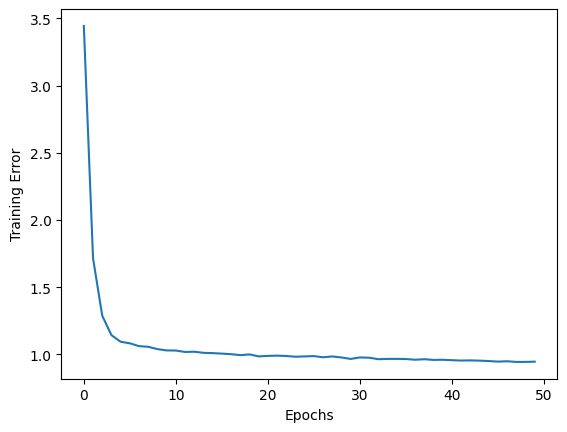

In [317]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

#### Predicciones

In [318]:
y_pred = model.predict(X_test)

24/24 [==============================] - 0s 1ms/step


Comparaciones de las predicciones y valores reales

In [319]:
print('Predicciones:', y_pred)
print('Valores reales:', y_test)

Predicciones: [[0.192349   0.2685329  0.53911805]
 [0.06184455 0.1925072  0.7456482 ]
 [0.43165404 0.29902697 0.269319  ]
 ...
 [0.24596657 0.27567485 0.47835863]
 [0.07350903 0.1996884  0.7268026 ]
 [0.20453645 0.27075306 0.5247105 ]]
Valores reales: 1003    2
594     2
461     0
3018    1
3091    2
       ..
1228    2
2480    2
2004    1
3022    2
3411    0
Name: FTR, Length: 760, dtype: int32
